**Course**: BIO-341 [_Systèmes dynamiques en biologie_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2023

Note that this document is primarily aimed at being consulted as a Jupyter notebook, the PDF rendering being not optimal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Growth models in 1D

## Linear model for population growth

Consider a population of $N$ birds with birth and death rates $n$ and $m$. Arrival of new individuals through migrations occurs at rate $a > 0$. This can be translated into the simple model:

\begin{equation}
\frac{dN}{dt} = F(N)=(n-m)N+a
\end{equation}

**1) Write down what type of equation this is, e.g. first order, second order, linear, non-linear, etc.**


>The equation is a linear first order ODE.

**2) Solve this equation analytically using the Ansatz**: $N(t)=Ae^{\lambda t} + B$. Express $A,B$ and $\lambda$ in function of the rates and the population size $N_{0} =N(t=0)$; explicitly write the solution $N(t)$.

>Differentiating the Ansatz gives: $\frac{dN}{dt} = A \lambda e^{\lambda t}$  
If the Ansatz is a solution of the differential equation, then $\frac{dN}{dt}$ is also equal to $(n-m)N + a$, so:
$$A \lambda e^{\lambda t} = k(Ae^{\lambda t} + B) + a\text{, with }k = (n-m)$$
By separating terms which depends on time and terms which are time-independent, we can deduce that $kB + a = 0 \Rightarrow B=- \frac{a}{k}$. In addition, by comparison of the left-hand side and right-hand side it follows that $\lambda = k$.  
To find A, use the initial conditions in the equation: $N(t=0)=N_{0} = A-\frac{a}{k} \Rightarrow A=N_{0}+\frac{a}{k}$.
Finally, $N(t)=(N_{0} + \frac{a}{k})e^{kt} -\frac{a}{k}$.

**3) Solve the equation using an alternative method, such as the separation of variables.**

>Solving an equation like $\frac{dN}{dt}=kN$ is trivial, so we seek for a change of variable that could get rid of the $+ a$ term in the original equation. Taking $N=u- \frac{a}{k} \Rightarrow u=N+\frac{a}{k}$ we have:   
$dN=du$, since $a$ and $k$ are two constants.  
$\frac{du}{dt}=ku \Rightarrow u=u_{0}e^{kt}$   
Then, you can substitute back: $N(t)=(N_{0} + \frac{a}{k})e^{kt} - \frac{a}{k}$ where $u_{0}=N_{0}+ \frac{a}{k}$  is found with the initial conditions.

>Another way to solve this equation is by a direct separation of variables.  
$\int_{N_{0}}^{N} \frac{dM}{kM+a}= \int_{0}^{t}d \tau \Rightarrow  \frac{1}{k} \ln (kM + a) \Big|_{N_{0}}^N  = t \Rightarrow \ln (\frac{kN + a}{kN_{0} + a}) = kt \Rightarrow N(t)=(N_{0} + \frac{a}{k})e^{kt} -\frac{a}{k}$

**4) Qualitative analysis**

1) Draw $F(N)$ in function of $N$ for the two cases (i) $n<m$ and (ii) $n>m$. *Note: you are also expected to draw and solve such simple problems by hand.*

>$F(N)$ is a linear function with intercept $a$ and slope $n-m$


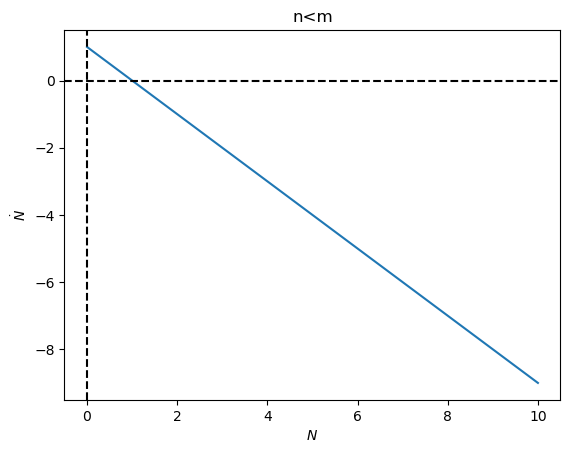

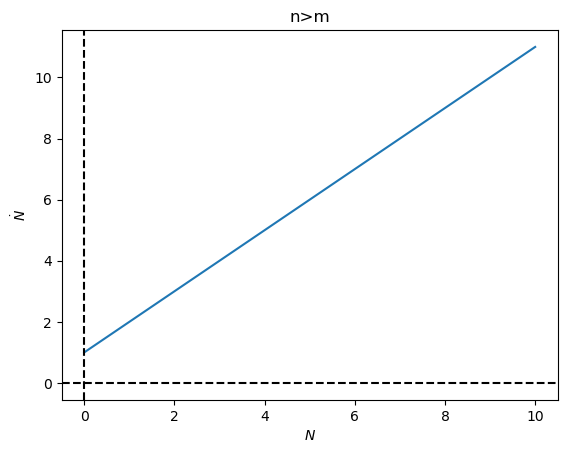

In [2]:
def Ndot(N,n,m,a):
    return (n-m)*N+a

Ndomain = np.linspace(0,10,100)

#plot
plt.plot(Ndomain, Ndot(Ndomain,1,2,1))
plt.xlabel('$N$')
plt.ylabel('$\dot{N}$')
plt.axhline(0, color = 'black', ls = '--')
plt.axvline(0, color = 'black', ls = '--')
plt.title('n<m')
plt.show()

plt.plot(Ndomain, Ndot(Ndomain,2,1,1))
plt.axhline(0, color = 'black', ls = '--')
plt.axvline(0, color = 'black', ls = '--')
plt.xlabel('$N$')
plt.ylabel('$\dot{N}$')
plt.title('n>m')
plt.show()

2) What is the main qualitative difference between the two cases and how does this affect the long time $t\to\infty$ behavior of the solution that you found above?

>If the death rate $m$ is bigger than the birth rate $n$ ($k<0$) the number of individuals "converges" to the constant $|\frac{a}{k}|$ at late times. On the contrary, if birth rate $n$ is bigger than death rate $m$ ($k>0$), then the population grows to infinity.

3) Here you can verify what you answered under 2) numerically. Generate some representative plots for $N(t)$ where you vary the parameters and initial conditions of the model.

In [3]:
#code the analytical function for N(t)
def N(N0, a, k, t):
    return (N0+a/k)*np.exp(k*t)-a/k

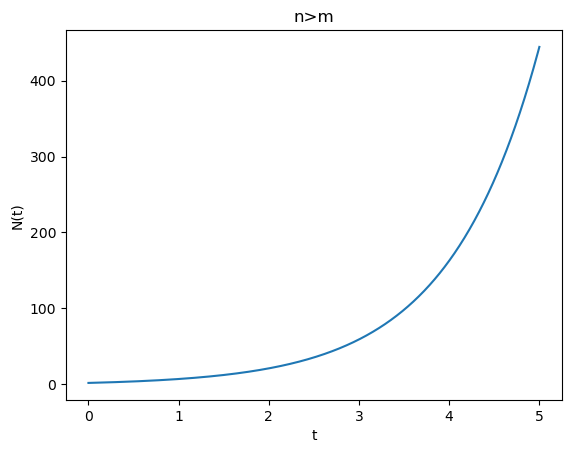

In [4]:
#simulate it with n>m
tspan = np.linspace(0,5,1000)
a = 1.
n = 2.
m = 1.
N0 = 2.

k = n-m

#plot
plt.plot(tspan, N(N0,a,k,tspan))
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('n>m')
plt.show()

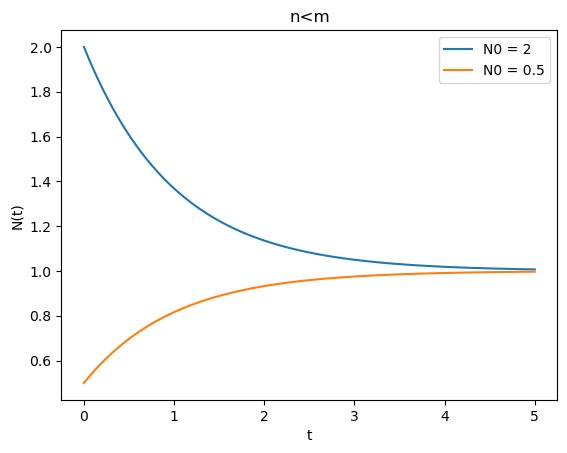

In [5]:
#simulate it with n<m
m = 3.
k = n-m

#plot
plt.plot(tspan, N(2,a,k,tspan), label = 'N0 = 2')
plt.plot(tspan, N(0.5,a,k,tspan), label = 'N0 = 0.5')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('n<m')
plt.legend()
plt.show()

In [6]:
# Create a widget to play with the parameters
# The widget does not work if you are using Jupyter Lab, but it works if you are using Jupyter Notebooks.
def f(k=1.):
    plt.plot(tspan, N(N0,a,k,tspan))
    plt.xlabel('t')
    plt.ylabel('N(t)')
    plt.title('Interactive plot: n-m=' + str(n-m))
    plt.show()

a = 1.
N0 = 10.
    
interact(f, k = (-3.,3.,0.01))

interactive(children=(FloatSlider(value=1.0, description='k', max=3.0, min=-3.0, step=0.01), Output()), _dom_c…

<function __main__.f(k=1.0)>

**5) Discuss why this equation is good or bad at describing real populations.**

>Limitations in resources are not taken into account in this equation, thus a population can grow to infinity in this model.

## Integration by separation of variables

**1) Solve the following differential equations to obtain $x(t)$ by the method of separation of variables. Use the initial condition $x(t)=x_{0}$ when $t=0$.**

1. $\frac{dx}{dt}= xe^{-2t}$
2. $\frac{dx}{dt}= 4x^{2}-1$

*Reminder*: The explicit solution of a differential equation $\frac{dx}{dt} = F(x)$ can be written as a function of $t, x(t)=g(t)$,  while the implicit form is written $h(x(t))=g(t)$, where the function $h(x)$ might not be easily invertible.

>1. Separating the variables gives :   
$\int_{x_{0}}^{x} \frac{1}{x} dx = \int_{0}^{t} e^{-2 t}d t$  
After integration you obtain the implicit form:   
$\ln(x(t))= - \frac{1}{2}e^{-2t} + C$   
With $C= \frac{1}{2} + \ln(x_{0})$  
The explicit form is:  
$x(t)=e^{\frac{1}{2}}x_{0}e^{-\frac{1}{2}e^{-2t}}$  

>2. Separating the variables gives :   
$\int_{x_{0}}^{x} \frac{1}{4x^{2}-1} dx = \int_{0}^{t}d t$  
And from partial fractions: $\frac{1}{4x^{2}-1} = \frac{1}{4}(\frac{1}{2x-1} - \frac{1}{2x+1} )$
So after integration you get:  
$x(t)=\frac{1}{2}(\frac{2x_0 + 1 \:+\: (2x_0 - 1)e^{4t})}{2x_0 + 1 \:-\: (2x_0 - 1)e^{4t}})$

## The Gompertz model for tumor growth

A surprisingly accurate model for the growth of a tumor of volume $N$ is given by the following differential equation
\begin{equation}
\frac{dN}{dt}=r(t)N(t) 
\end{equation}
with $r(t)=r_{0}e^{-at}$ and initial size $N(0)=N_{0}$. In other words, the population grows with a time dependent rate $r(t)$, which decreases exponentially in time with a rate $a$.  

**1) Give a plausible explanation for the proposed behavior of $r(t)$. Why should the growth rate decrease with time?**

>This is due to the fact that resources (i.e. nutrients) become limiting : as the population grows, the surface of the tumor grows slower than its volume, so the nutrients intake per cell decreases in time. The lack of space also limits the growth.

**2) What is the meaning of $r_{0}$?**

>$r_{0}$ is the population *relative* growth rate at time zero $(t=0)$

**3) Show that the solution for $N(t)$ in function of the 3 parameters $N_{0}, r_{0}, a$  can be written as $N(t)=N_{0}e^{\frac{r_{0}}{a}(1-e^{-at})}$.**  
*Hint*: Use the method of separation of variables.

>$\int_{N_{0}}^{N} \frac{1}{N} dN= r_{0} \int_{0}^{t}e^{-at} dt$
>
Integration gives the solution.

**4) Study the solution:**

1. Show that for very short times the population grows linearly like $N(t)= N_0 (1 + r_0 t)$.
2. Show that for very long times $N(t)\cong N_{max}(1-\frac{r_{0}}{a}e^{-at})$.


*Hint*: Use the Taylor approximation $e^{x} \approx 1 + x$ (valid for small x) for the inner or the outer exponential when appropriate.

>1. When $t$ is close to zero, the condition for the Taylor approximation is valid for the inner exponential $e^{-at}$.  
Using $e^{-at} \approx 1 - at$, we find that:  
$N(t)=N_{0}e^{\frac{r_{0}}{a}(1-1+at)}=N_{0}e^{r_{0}t}$  
Then, we apply the Taylor approximation again, the growth is *linear* for small times:
$$N(t) \approx N_0 e^{r_{0}t} \approx N_0 (1 + r_0 t)$$

>2. Rewriting the solution like:  
$N(t)=N_{0}e^{\frac{r_{0}}{a}}e^{-\frac{r_{0}e^{-at}}{a}}$  
We see that $-\frac{r_{0}}{a}e^{-at}$ becomes small when $t$ is large, so we can use the Taylor expansion to the first order:  
$N(t)=N_{0}e^{\frac{r_{0}}{a}}(1- \frac{r_{0}}{a}e^{-at})$ <br> or $N(t)=N_{max}(1- \frac{r_{0}}{a}e^{-at})$ with $N_{max}=N_{0}e^{\frac{r_{0}}{a}}$.

**5) Sketch the solution. Indicate $N_{max}$. How does the $N$ approaches $N_{max}$?**

Here is the plot of the solution for arbitrary values of the constants $N_{0}, r_{0}$ and $a$. $N_{max}$ is the asymptotic value of $N(t)$ for long times. $N$ approaches $N_{max}$ exponentially fast.

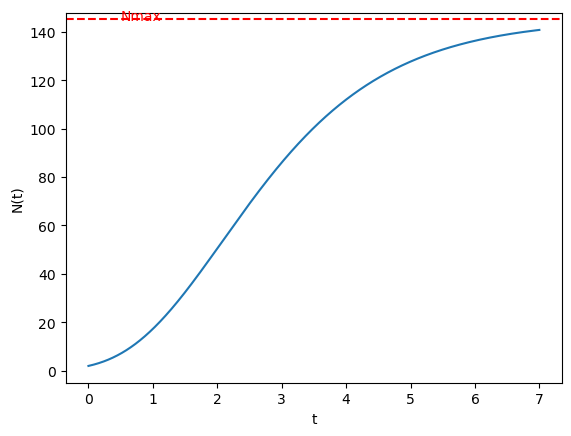

In [7]:
#define analytical function for N
def N2(N0, r0, a, t):
    return N0*np.exp((r0/a)*(1-np.exp(-a*t)))

#define parameters
N0 = 2
r0 = 3
a = 0.7
Nmax = N0*np.exp(r0/a)
tspan = np.linspace(0,7,1000)

#plot
plt.plot(tspan, N2(N0,r0,a,tspan))
plt.axhline(Nmax, color = 'red', ls = '--')
plt.text(0.5, Nmax-0.5, 'Nmax', color = 'red')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()